<a href="https://colab.research.google.com/github/jdoherty2022/Probability_Statistics/blob/main/Doherty_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [49]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #sets image paramaters
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url): #gets presentation
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): #uses previous function to get images from presentation
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device) #function that loads images
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [18]:
url = "https://docs.google.com/presentation/d/11B_DcFh5A6FWzcdl_qGNzVDIDyRtcBKUeb2g86gaOK0/edit#slide=id.p"

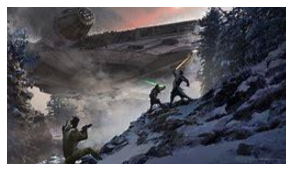

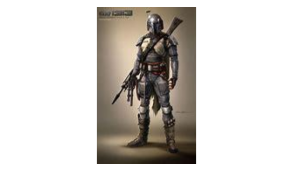

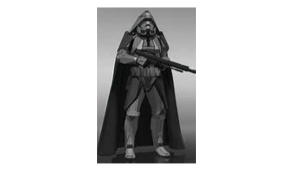

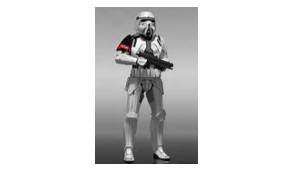

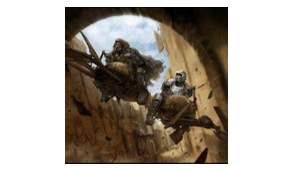

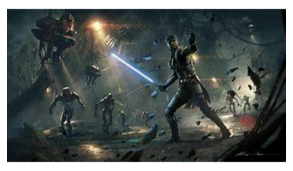

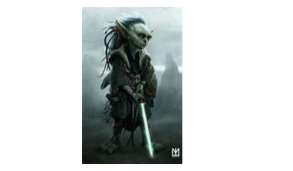

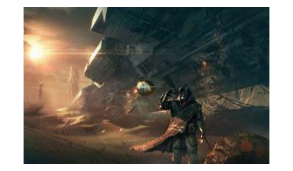

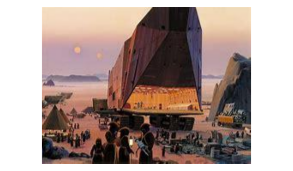

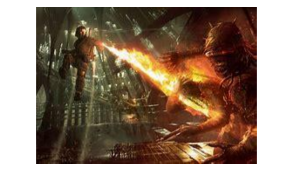

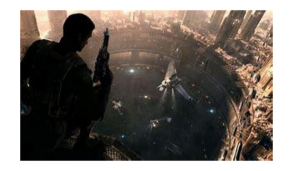

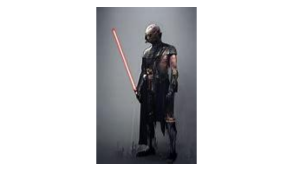

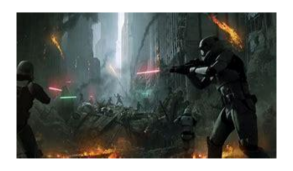

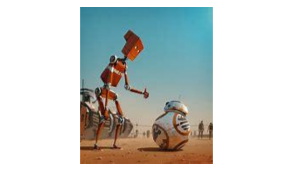

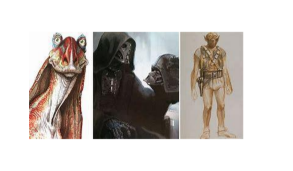

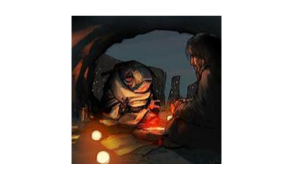

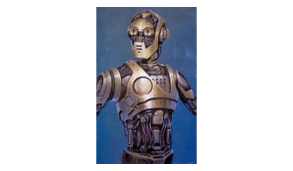

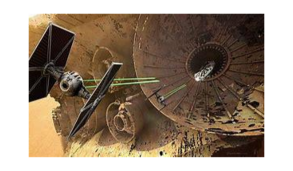

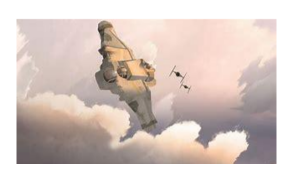

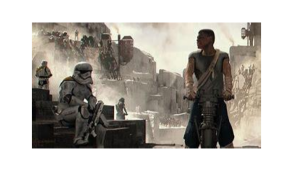

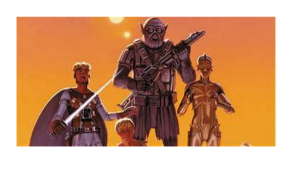

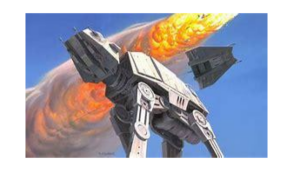

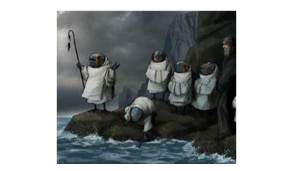

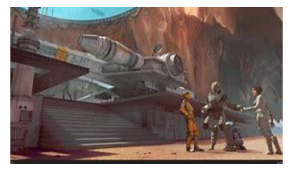

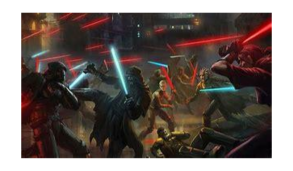

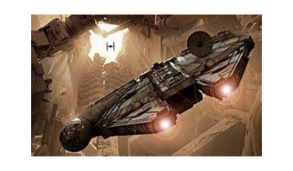

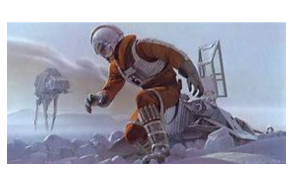

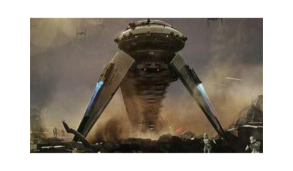

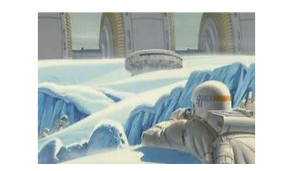

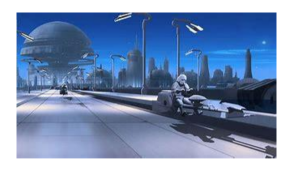

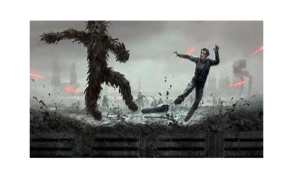

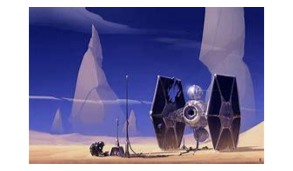

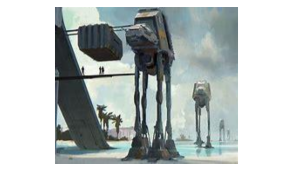

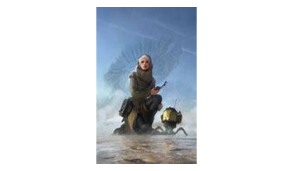

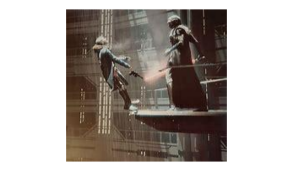

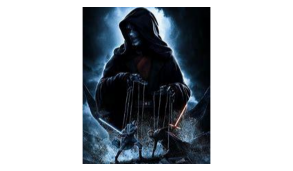

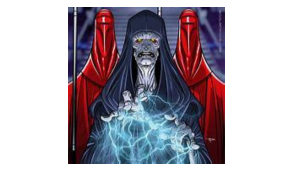

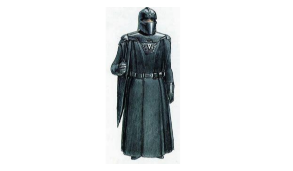

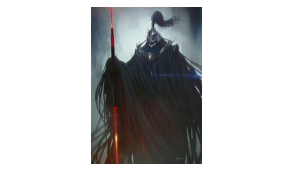

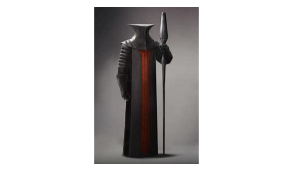

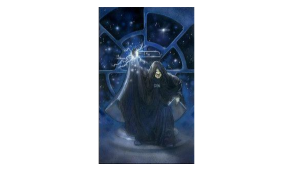

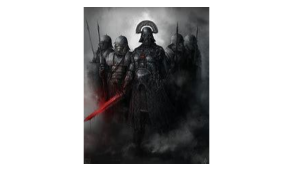

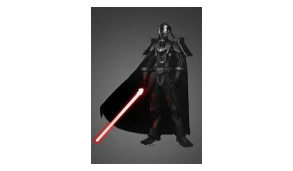

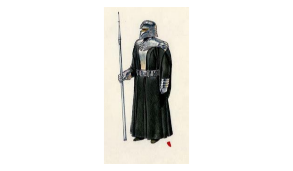

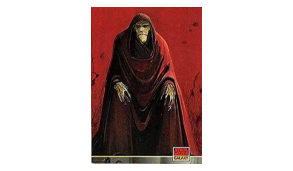

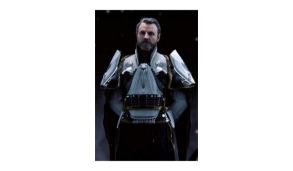

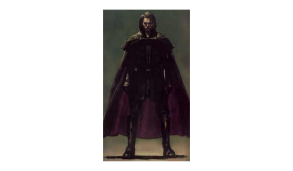

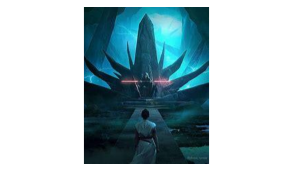

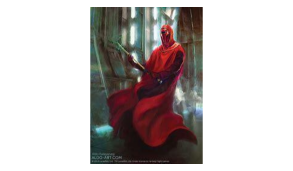

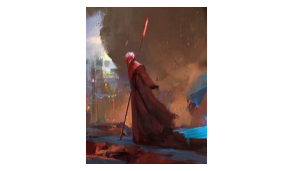

In [19]:
images = [] #displays images from slides

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [20]:
images.shape #sets shape of image

torch.Size([50, 3, 224, 224])

In [21]:
model(images) #gives cordinates of image

tensor([[-0.1370, -0.4163,  2.2785,  ...,  0.2666, -0.6238, -0.6010],
        [-4.8324, -4.4062, -2.8210,  ..., -5.4649, -0.5841,  0.0785],
        [-1.5668, -5.5615, -1.6366,  ..., -7.7001, -0.9486, -0.9217],
        ...,
        [ 1.6634,  0.4305,  1.4442,  ..., -2.2927,  0.0583,  1.3710],
        [-0.2056,  0.0910, -1.5094,  ..., -3.3325,  0.4480, -0.6834],
        [ 0.2931,  1.8814,  0.4529,  ..., -2.1125, -1.0833, -0.8848]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [22]:
y = model(images)

In [23]:
y.shape #size and shape of function

torch.Size([50, 1000])

In [24]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [25]:
for i in list(guesses):
    print(labels[i])

submarine, pigboat, sub, U-boat
table lamp
trench coat
breastplate, aegis, egis
hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa
oxygen mask
can opener, tin opener
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
lumbermill, sawmill
rotisserie
airship, dirigible
bassoon
solar dish, solar collector, solar furnace
Arabian camel, dromedary, Camelus dromedarius
abaya
oxygen mask
breastplate, aegis, egis
thresher, thrasher, threshing machine
pencil sharpener
bulletproof vest
comic book
comic book
yawl
sorrel
go-kart
plane, carpenter's plane, woodworking plane
tick
tripod
quilt, comforter, comfort, puff
garbage truck, dustcart
barn spider, Araneus cavaticus
solar dish, solar collector, solar furnace
drilling platform, offshore rig
dogsled, dog sled, dog sleigh
fire screen, fireguard
ski mask
ski mask
bulletproof vest
punching bag, punch bag, punching ball, punchball
can opener, tin opener
book jacket, dust cover, dust jacket, du

In [26]:
Y = np.zeros(50,)
Y[25:] = 1

In [27]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
X = y.detach().cpu().numpy() 

In [29]:
X.shape

(50, 1000)

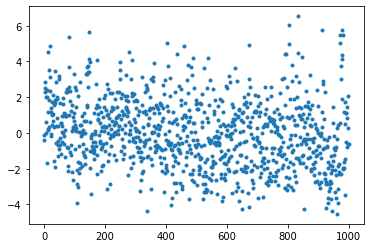

In [30]:
plt.plot(X[0],'.')

In [31]:
X[0]

array([-1.36957660e-01, -4.16319370e-01,  2.27854729e+00,  2.52066708e+00,
        2.83269882e+00,  1.98533285e+00,  6.17413104e-01,  2.55498290e-02,
        2.01293039e+00, -1.65366280e+00,  2.39433002e+00,  1.51631862e-01,
        1.19099474e+00,  4.52165365e+00,  2.39627719e-01,  1.82234573e+00,
        3.45137000e-01,  3.52810717e+00,  2.32162476e+00,  3.15301418e+00,
        4.86119413e+00, -5.58827221e-02,  1.15468776e+00,  1.38508844e+00,
       -1.89445674e-01,  1.70627141e+00,  1.01492262e+00,  4.51455861e-01,
        1.05462945e+00,  6.84682071e-01,  2.10785198e+00, -1.58719134e+00,
        1.55482101e+00,  3.57617706e-01,  3.47626710e+00,  1.65930045e+00,
        1.83169854e+00, -1.88173485e+00, -5.52478194e-01,  2.86180711e+00,
        3.69644493e-01,  8.37252736e-01,  1.88138103e+00,  2.03593779e+00,
        4.12714154e-01, -4.21839654e-01, -1.28006792e+00, -6.70316935e-01,
       -8.98382604e-01,  3.03849959e+00,  3.18078089e+00,  1.66146648e+00,
       -6.52885079e-01, -

In [32]:
np.argmax(X[0])

833

In [33]:
labels[948]

'Granny Smith'

In [34]:
top_ten = np.argsort(X[0])[::-1][0:10] #sets value of variable

In [35]:
for i in top_ten: #prints labels
    print(labels[i])

submarine, pigboat, sub, U-boat
snowmobile
valley, vale
wreck
albatross, mollymawk
volcano
cliff, drop, drop-off
ptarmigan
aircraft carrier, carrier, flattop, attack aircraft carrier
alp


In [36]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 23.,  84., 172., 207., 220., 164.,  78.,  31.,  14.,   7.]),
 array([-4.527325  , -3.4218726 , -2.31642   , -1.2109674 , -0.10551481,
         0.9999378 ,  2.1053903 ,  3.2108428 ,  4.3162956 ,  5.421748  ,
         6.5272007 ], dtype=float32),
 <a list of 10 Patch objects>)

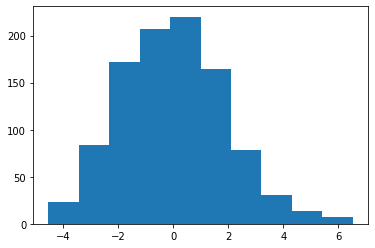

In [37]:
plt.hist(X[0])

In [38]:
X = GPU_data(X)
Y = GPU_data(Y)

In [39]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [40]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [41]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [42]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [43]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [44]:
X.shape

torch.Size([50, 1000])

In [45]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [46]:
def model(x,w):

    return x@w[0]

In [47]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [48]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

Best- 3 minutes
average- 4 minutes
worst- 5 minutes